# Principal Components Analysis 
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [16]:
import pandas as pd
import numpy as np
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
# split data table into data X and class labels y

x = df.drop(columns="class") 
y = df.iloc[:,4].values
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Standardization

The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.
More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.
Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.


In [17]:
x_std=x.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

## Step 2: Covariance Matrix computation

The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix. 
What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?

It’s actually the sign of the covariance that matters :
if positive then : the two variables increase or decrease together (correlated)
if negative then : One increases when the other decreases (Inversely correlated)
Now, that we know that the covariance matrix is not more than a table that summaries the correlations between all the possible pairs of variables, let’s move to the next step.

In [18]:
cov_mat = (x_std - np.mean(x_std)).T.dot((x_std - np.mean(x_std))) / (x_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
           sepal_len  sepal_wid  petal_len  petal_wid
sepal_len   1.006711  -0.110103   0.877605   0.823443
sepal_wid  -0.110103   1.006711  -0.423338  -0.358937
petal_len   0.877605  -0.423338   1.006711   0.969219
petal_wid   0.823443  -0.358937   0.969219   1.006711


## Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix

what is eigenvectors and eigenvalues ref link (https://www.youtube.com/watch?v=IdsV0RaC9jM)

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [20]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


## Step 4: Selecting principal Components

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, :

In [23]:
for ev in eig_vecs:
    print("Eigen Vector :-",ev)
    print("Eigen Vector length :-", np.linalg.norm(ev))

Eigen Vector :- [ 0.52237162 -0.37231836 -0.72101681  0.26199559]
Eigen Vector length :- 0.9999999999999991
Eigen Vector :- [-0.26335492 -0.92555649  0.24203288 -0.12413481]
Eigen Vector length :- 1.0000000000000004
Eigen Vector :- [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
Eigen Vector length :- 1.0
Eigen Vector :- [ 0.56561105 -0.06541577  0.6338014   0.52354627]
Eigen Vector length :- 1.0000000000000002


In order to decide which eigenvector(s) can be dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [28]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    print("Corresponding eigen vector",i[1])


Eigenvalues in descending order:
2.9303537755893156
Corresponding eigen vector [ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.9274036215173409
Corresponding eigen vector [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
0.1483422264816399
Corresponding eigen vector [-0.72101681  0.24203288  0.14089226  0.6338014 ]
0.020746013995595954
Corresponding eigen vector [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


how many principal components are we going to choose for our new feature subspace is selcted by explained variance
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [49]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
for i in var_exp:
    print("Amount of variance explained by eig value components:- ",i,"%")
cum_var_exp = np.cumsum(var_exp)  
print(cum_var_exp)

Amount of variance explained by eig value components:-  72.77045209380135 %
Amount of variance explained by eig value components:-  23.030523267680636 %
Amount of variance explained by eig value components:-  3.6838319576273912 %
Amount of variance explained by eig value components:-  0.515192680890633 %
[ 72.77045209  95.80097536  99.48480732 100.        ]


most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

projection matrix :-  matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [37]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


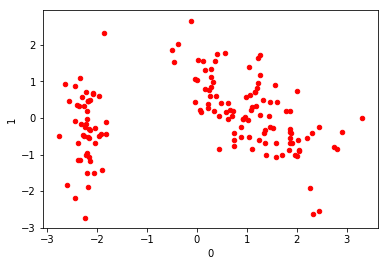

In [48]:
Y = x_std.dot(matrix_w)
#print(Y)
import matplotlib.pyplot as plt

import pandas as pd

# a scatter plot comparing num_children and num_pets
Y.plot(kind='scatter',x=0,y=1,color='red')
plt.show()

## Implementing PCA using python inbuilt methods

In [64]:
import sklearn.datasets, sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_std)
nComp = 2 # Number of PCA components to consider
print("pca.components :- \n",pca.components_[:2,:])

pca.components :- 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


PCA Components are same as matrix_w we obtain from calculation

In [59]:
mu = np.mean(x_std, axis=0)

## References:-
1) https://towardsdatascience.com/a-step-by-step-explanation-of-principal-component-analysis-b836fb9c97e2
2) https://plot.ly/ipython-notebooks/principal-component-analysis/
3) https://sebastianraschka.com/Articles/2014_pca_step_by_step.html
4) https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com